# SIR modell készítése
#### Anita és Ádám közös munkája

In [2]:
'''import numpy as np
import scipy as sci
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
R0 = 2.4
t_infective = 5.1 + 3.3 

# initial number of infected and recovered individuals
i_initial = 2/9800000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0*gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)'''

"import numpy as np\nimport scipy as sci\nfrom scipy.integrate import odeint\nimport matplotlib.pyplot as plt\n\n# parameter values\nR0 = 2.4\nt_infective = 5.1 + 3.3 \n\n# initial number of infected and recovered individuals\ni_initial = 2/9800000\nr_initial = 0.00\ns_initial = 1 - i_initial - r_initial\n\ngamma = 1/t_infective\nbeta = R0*gamma\n\n# SIR model differential equations.\ndef deriv(x, t, beta, gamma):\n    s, i, r = x\n    dsdt = -beta * s * i\n    didt = beta * s * i - gamma * i\n    drdt =  gamma * i\n    return [dsdt, didt, drdt]\n\nt = np.linspace(0, 180, 2000)\nx_initial = s_initial, i_initial, r_initial\nsoln = odeint(deriv, x_initial, t, args=(beta, gamma))\ns, i, r = soln.T\ne = None\n\ndef plotdata(t, s, i, e=None):\n    # plot the data\n    fig = plt.figure(figsize=(12,6))\n    ax = [fig.add_subplot(221, axisbelow=True), \n          fig.add_subplot(223),\n          fig.add_subplot(122)]\n\n    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')\n    ax[0].plot(t

In [3]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import sympy as sym
from sympy.utilities.lambdify import implemented_function
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

In [4]:
data=pd.read_csv("owid-covid-data.csv")

In [5]:
t = sym.symbols('t')
S = sym.Function('S')(t)
I = sym.Function('I')(t)
R = sym.Function('R')(t)
beta = sym.symbols(u'β')
gamma = sym.symbols(u'γ')
dSdt=sym.Derivative(S,t)
dIdt=sym.Derivative(I,t)
dRdt=sym.Derivative(R,t)

eq1=sym.Equality(dSdt, -beta * S * I)
eq2=sym.Equality(dIdt, beta * S * I - gamma * I)
eq3=sym.Equality(dRdt,  gamma * I)

display(eq1,eq2,eq3)

Eq(Derivative(S(t), t), -β*I(t)*S(t))

Eq(Derivative(I(t), t), β*I(t)*S(t) - γ*I(t))

Eq(Derivative(R(t), t), γ*I(t))

In [6]:
pd.options.mode.chained_assignment = None

sir_data=pd.read_csv("sir_data.csv")
sir_countries=["Austria","Finland","Germany","Hungary","Ireland","European Union"]
sir_data=sir_data[sir_data["Country"].isin(sir_countries)]
sir_indexes=[sir_data[sir_data['Country'] == country].index[-1] for country in sir_countries]
for index in sir_indexes:
    sir_data['R0'][index]=float(sir_data['R0'][index][0:(sir_data['R0'][index]).find('±')])
for index in sir_indexes:
    sir_data['Δt'][index]=float(sir_data['Δt'][index][0:(sir_data['Δt'][index]).find('±')])
sir_data.insert(7, "Beta", [sir_data["R0"][index]/sir_data["Δt"][index] for index in sir_indexes], True)
for index in sir_indexes:
    temp=sir_data['Population'][index]
    sir_data['Population'][index]=int(temp.replace('.', '', temp.count('.')))

sir_data

,Country,Population,R0,Rt,t*,T,Δt,Beta
0,Austria,8840521,4.38,0.45±0.01,13.37±0.68,6.49±0.47,8.33,0.525810
8,Finland,5515525,1.62,0.92±0.01,25.05±0.51,1.20±0.68,24.25,0.066804
10,Germany,82905782,6.33,0.58±0.01,17.06±1.39,12.41±0.71,3.25,1.947692
12,Hungary,9775564,1.97,0.37±0.15,25.62±6.55,20.23±7.33,31.67,0.062204
13,Ireland,4867309,1.94,0.57±0.03,30.78±0.53,5.94±1.28,30.0,0.064667
27,European Union,446786293,4.22,0.67±0.18,18.61±6.43,10.82±4.65,17.24,0.244780


In [7]:
beta=float(beta.subs(beta,sir_data["Beta"][0]))
gamma=float(gamma.subs(gamma,1/sir_data["Δt"][0]))
gamma

0.12004801920768307

In [8]:
I_initial = 2/sir_data["Population"][0]
R_initial = 0
S_initial = 1-R_initial-I_initial

x_initial= S_initial, I_initial, R_initial
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 180, 2000)
x_initial = S_initial, I_initial, R_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))

In [9]:
s, i, r = soln.T*sir_data['Population'][0]
y=np.linspace(0,sir_data['Population'][0],10)
y


array([      0.        ,  982280.11111111, 1964560.22222222,
       2946840.33333333, 3929120.44444444, 4911400.55555556,
       5893680.66666667, 6875960.77777778, 7858240.88888889,
       8840521.        ])

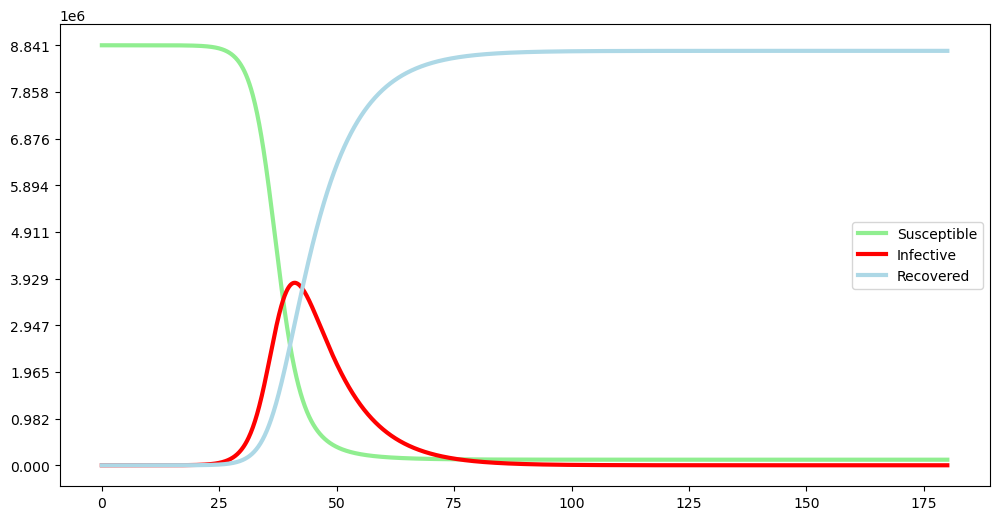

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_yticks(y)
ax.plot(t, s, lw=3, label='Susceptible', c='lightgreen')
ax.plot(t, i, lw=3, label='Infective', c='red')
ax.plot(t, r, lw=3, label='Recovered', c='lightblue')
ax.legend()
fig

In [11]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

In [12]:
population=sir_data["Population"][0]
print(sir_data["Population"][0])
fraction=2/population

8840521


In [22]:
g = nx.erdos_renyi_graph(1000, 0.1)

In [23]:
model = ep.SIRModel(g)

In [24]:
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5258103241296519)
cfg.add_model_parameter('gamma', 0.12004801920768307)
cfg.add_model_parameter("fraction_infected", 0.001)
model.set_initial_status(cfg)

In [25]:
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

In [26]:
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

viz = DiffusionTrend(model, trends)
viz.plot("diffusion.pdf")

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [20]:
print(beta)
print(gamma)
print(fraction)

0.5258103241296519
0.12004801920768307
2.2623101059315395e-07


In [30]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
%matplotlib qt


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.SIRModel(g)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5258103241296519)
cfg.add_model_parameter('gamma', 0.12004801920768307)
cfg.add_model_parameter("fraction_infected", 2.2623101059315395e-06)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot("diffusion.pdf")

c:\Users\temes\anaconda3\Lib\site-packages\ndlib\models\DiffusionModel.py:169: UserWarning: The fraction_infected value is too low given the number of nodes of the selected graph: a single node will be set as infected
  warnings.warn(
